In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
from scipy.optimize import curve_fit

In [2]:
pathData = '../../../data/realData/'
dfSusman = pd.read_csv(pathData + 'modified_Susman18_physical_units.csv')

Text(0.5, 1.0, 'Susman sizes at birth')

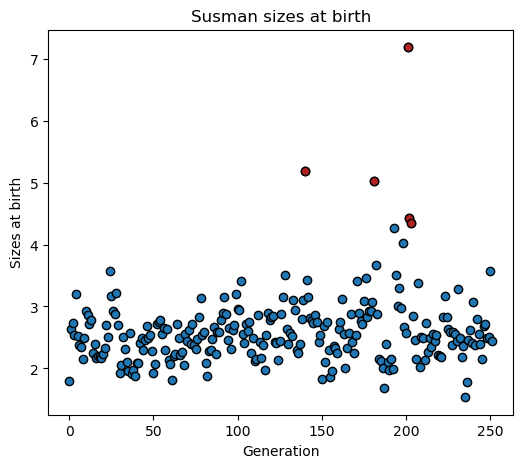

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
seizesAtBirth = np.array(dfSusman['length_birth'])
ax.scatter(range(len(dfSusman)), seizesAtBirth, edgecolor = 'black')
zScores = (seizesAtBirth - np.mean(seizesAtBirth)) / np.std(seizesAtBirth)
idxOut = np.where(np.abs(zScores) > 3)[0]
ax.scatter(np.arange(len(dfSusman))[idxOut], seizesAtBirth[idxOut], color = 'firebrick', edgecolor = 'black')
ax.set_xlabel('Generation')
ax.set_ylabel('Sizes at birth')
ax.set_title('Susman sizes at birth')

Text(0.5, 1.0, 'Susman sizes at birth distribution')

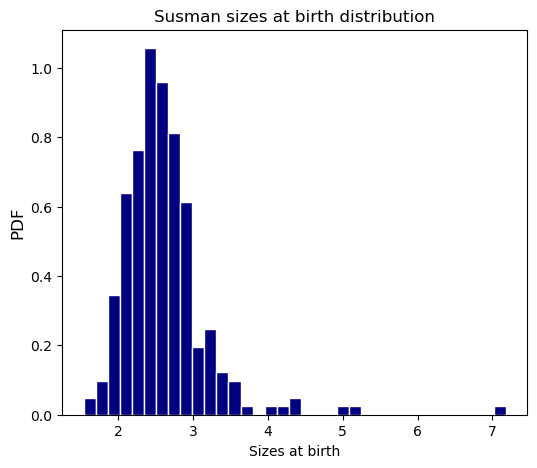

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
_, _, _ = ax.hist(dfSusman['length_birth'], bins = 'fd', density = True, edgecolor = 'white', color = 'navy')
ax.set_xlabel('Sizes at birth')
ax.set_ylabel('PDF', fontsize = 12)
ax.set_title('Susman sizes at birth distribution', fontsize = 12)

In [5]:
def autoCorrelationFunc(t, xi, n_c):
    return t**(-xi) * np.exp(-t/n_c)

Fitted autocorrelation length: 30.552,
Fitted (2 - eta): 1.294


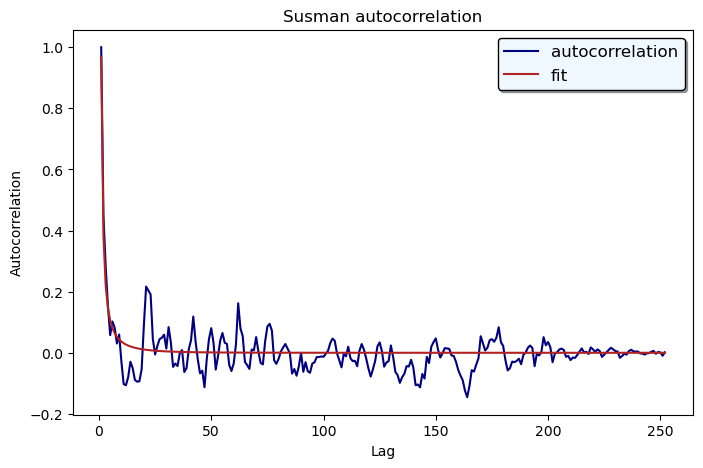

In [6]:
autocorrelation = acf(dfSusman['length_birth'], nlags = len(dfSusman) - 1)
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
_ = ax.plot(range(1, len(autocorrelation) + 1), autocorrelation, color = 'navy', label = 'autocorrelation')
popt, pcov = curve_fit(autoCorrelationFunc, list(range(1, len(autocorrelation) + 1)), autocorrelation)
_ = ax.plot(range(1, len(autocorrelation) + 1), autoCorrelationFunc(np.array(list(range(1, len(autocorrelation) + 1))), *popt), color = 'firebrick', label = 'fit')
ax.set_xlabel('Lag')
ax.set_ylabel('Autocorrelation')
ax.set_title('Susman autocorrelation')
_ = ax.legend(facecolor = 'aliceblue', shadow = True, edgecolor = 'black', fontsize = 12)
print(f'Fitted autocorrelation length: {popt[1]:.3f},\nFitted (2 - eta): {popt[0]:.3f}')


In [9]:
print(f'Mean size at birth: {np.mean(seizesAtBirth):.3}')

Mean size at birth: 2.61
